In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier 

In [130]:
df=pd.read_excel(r"C:\Users\DELL\Downloads\heart_disease.xlsx",sheet_name="Heart_disease")

In [168]:
df_SHEET=pd.read_excel(r"C:\Users\DELL\Downloads\heart_disease.xlsx")
df_SHEET[:12]

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [131]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [132]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [133]:
df.shape

(908, 13)

In [134]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [135]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [226]:
groups = df.groupby(['sex', pd.cut(df.age, bins)])
groups.size().unstack()

PLT.

age,"(1, 10]","(10, 25]","(25, 50]","(50, 100]"
sex,,,,
0,0,0,75,114
1,0,0,223,434


In [237]:
# Group by age and aggregate to get counts, mean, etc.
sex_age=df.groupby(by="sex").agg({"age": ["count"]})
sex_age

,age
,count
sex,
0,189
1,657


In [141]:
plt.pie(x=for xsex_age,data=df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [142]:
df.dropna(inplace=True)

In [143]:
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["fbs"]=le.fit_transform(df["fbs"])
df["exang"]=le.fit_transform(df["exang"].astype(str))
df["slope"]=le.fit_transform(df["slope"])
df["thal"]=le.fit_transform(df["thal"])
df["restecg"]=le.fit_transform(df["restecg"])
df["cp"]=le.fit_transform(df["cp"])

In [144]:
x=df.iloc[:,:-1]
y=df["num"]

In [145]:
y

0      0
1      0
2      0
3      0
4      0
      ..
901    4
902    4
903    4
904    4
905    4
Name: num, Length: 846, dtype: int64

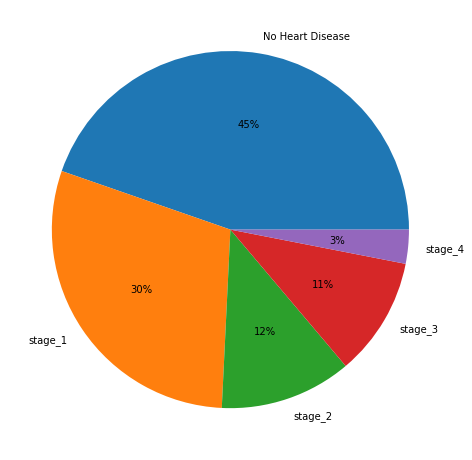

In [173]:
plt.figure(figsize=(8,10))
plt.pie(x=y.value_counts(),data=df,labels=['No Heart Disease',"stage_1","stage_2","stage_3","stage_4"],autopct='%1.0f%%')
plt.show()

In [146]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(x)

In [174]:
X_train,x_test,y_train,y_test=train_test_split( scaled_X, y, test_size=0.2, random_state=42,stratify=y)

In [175]:
X_train.shape
x_test.shape

(170, 12)

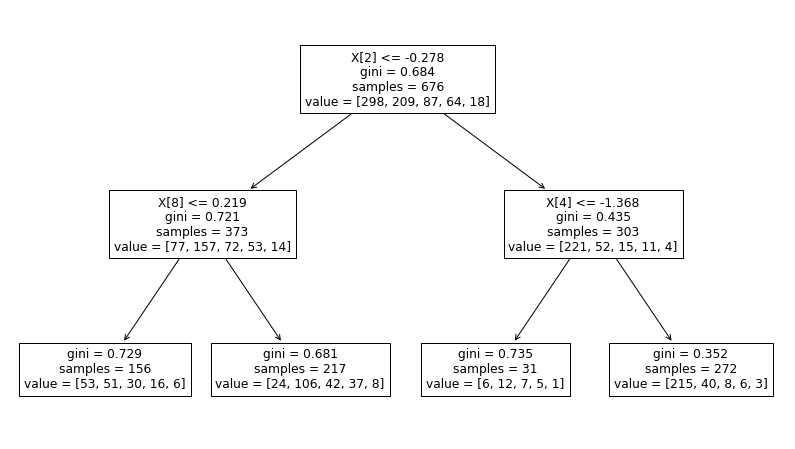

In [150]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8))
plot_tree(dt_model)
plt.show()

In [183]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=123)
dt_model=dt_model.fit(X_train,y_train)

In [184]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator = dt_model,
                             param_grid = {'criterion':['gini','entropy'],
                                           'max_depth':[2,3,4,5,6]},
                             cv=5)
grid_search_cv.fit(scaled_X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'gini', 'max_depth': 2}
0.5236895231465366


In [185]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,roc_curve

In [186]:
y_pred_train=dt_model.predict(X_train)

In [187]:
accuracy_score(y_train,y_pred_train)

0.5739644970414202

In [220]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.64      0.91      0.75       302
           1       0.46      0.56      0.51       200
           2       0.00      0.00      0.00        80
           3       0.00      0.00      0.00        73
           4       0.00      0.00      0.00        21

    accuracy                           0.57       676
   macro avg       0.22      0.30      0.25       676
weighted avg       0.42      0.57      0.49       676



In [189]:
print(confusion_matrix(y_train,y_pred_train))

[[275  27   0   0   0]
 [ 87 113   0   0   0]
 [ 35  45   0   0   0]
 [ 23  50   0   0   0]
 [ 11  10   0   0   0]]


In [190]:
# Test Data

In [191]:
y_pred_test=dt_model.predict(x_test)

In [192]:
accuracy_score(y_test,y_pred_test)

0.5352941176470588

In [193]:
confusion_matrix(y_test,y_pred_test)

array([[64, 12,  0,  0,  0],
       [23, 27,  0,  0,  0],
       [ 6, 15,  0,  0,  0],
       [ 6, 12,  0,  0,  0],
       [ 0,  5,  0,  0,  0]], dtype=int64)

In [221]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73        76
           1       0.38      0.54      0.45        50
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         5

    accuracy                           0.54       170
   macro avg       0.21      0.28      0.24       170
weighted avg       0.40      0.54      0.46       170



In [195]:
df["num"].value_counts()

0    378
1    250
2    101
3     91
4     26
Name: num, dtype: int64

In [202]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=4,class_weight={0:1,1:3.75,2:3.75,3:3.75,4:3.75})
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3.75, 2: 3.75, 3: 3.75, 4: 3.75},
                       max_depth=4)

In [203]:
y_pred_train_rf = rf_model.predict(X_train)

In [204]:
accuracy_score(y_train,y_pred_train_rf)

0.5828402366863905

In [209]:
print(classification_report(y_train,y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.93      0.61      0.73       302
           1       0.41      0.93      0.57       200
           2       1.00      0.07      0.14        80
           3       0.95      0.26      0.41        73
           4       0.00      0.00      0.00        21

    accuracy                           0.58       676
   macro avg       0.66      0.37      0.37       676
weighted avg       0.76      0.58      0.56       676



In [207]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator = rf_model,
                             param_grid = {'criterion':['gini','entropy'],
                                           'max_depth':[2,3,4,5,6]},
                             cv=5)
grid_search_cv.fit(scaled_X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 5}
0.49172293769578845


In [206]:
confusion_matrix(y_train,y_pred_train_rf)

array([[183, 119,   0,   0,   0],
       [ 14, 186,   0,   0,   0],
       [  0,  74,   6,   0,   0],
       [  0,  54,   0,  19,   0],
       [  0,  20,   0,   1,   0]], dtype=int64)

In [ ]:
#rf on test data

In [215]:
y_pred_test_rf = rf_model.predict(x_test)

In [217]:
accuracy_score(y_test,y_pred_test_rf)

0.5470588235294118

In [218]:
from warnings import filterwarnings
filterwarnings("ignore")
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.94      0.58      0.72        76
           1       0.40      0.96      0.56        50
           2       0.00      0.00      0.00        21
           3       0.33      0.06      0.10        18
           4       0.00      0.00      0.00         5

    accuracy                           0.55       170
   macro avg       0.33      0.32      0.28       170
weighted avg       0.57      0.55      0.50       170



In [207]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator = rf_model,
                             param_grid = {'criterion':['gini','entropy'],
                                           'max_depth':[2,3,4,5,6]},
                             cv=5)
grid_search_cv.fit(scaled_X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 5}
0.49172293769578845


In [219]:
confusion_matrix(y_test,y_pred_test_rf)

array([[44, 32,  0,  0,  0],
       [ 2, 48,  0,  0,  0],
       [ 0, 19,  0,  2,  0],
       [ 1, 16,  0,  1,  0],
       [ 0,  5,  0,  0,  0]], dtype=int64)